# EDA : Zomato Restaurant name and Metadata
***Contributor : Md Ismail Quraishi***

### Problem statement
Perform EDA on Zomato Restaurant name and Metadata.csv file and get insights about the data so that these data can be used intelligently for recommendation system.

#### Data details :
1. Name : Name of the restaurants
2. Links : Website link of the restaurant
3. Cost : Cost of the items/foods
4. Collections : Types of the items/foods
5. Cuisines : varieties of the items/foods
6. Timings : Restaurant opening and closing timings.

### Know your data

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import commonFunctions
import nltk
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# Data loading
path= './data/Zomato Restaurant names and Metadata.csv'
restaurant_meta_data = pd.read_csv(path)

In [3]:
# First view
restaurant_meta_data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
# Diplays shape, # of duplicated, # of unique values, # of nan values, info of the dataframe.
commonFunctions.showInfo(restaurant_meta_data) # This function is defined inside commonFunctions.py file

shape :  (105, 6)

# of duplicated rows :  0

# of unique values in each column : 
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

# of missing/nan values in each column : 
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Calling info method : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB
None


In [5]:
# Describe
restaurant_meta_data.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [6]:
# Unique values in Cost column
restaurant_meta_data['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [7]:
# Unique values in Collections column
restaurant_meta_data['Collections'].unique()

array(['Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings',
       "Hyderabad's Hottest", "Great Buffets, Hyderabad's Hottest",
       'Late Night Restaurants',
       "Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest",
       "Sunday Brunches, Corporate Favorites, Great Buffets, Hyderabad's Hottest, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated",
       'Food Hygiene Rated Restaurants in Hyderabad', nan,
       'Great Buffets, Live Sports Screenings, Best Bars & Pubs, Trending This Week',
       'Frozen Delights', 'Street Food, Veggie Friendly, Pocket Friendly',
       'Barbecue & Grill', 'Great Buffets',
       'Corporate Favorites, Happy Hours, Live Sports Screenings, Rooftops, Trending This Week',
       "Barbecue & Grill, Great Buffets, Corporate Favorites, Hyderabad's Hottest",
       'Trending This Week', 'Veggie Friendl

### What do you know about your data :
1. shape : 105,6
2. no. of duplicated rows : 0
3. no. of unique values : Name - 105, Links - 105, Cost - 25, Collections - 42, Cuisines - 92, Timings - 77
4. no. of missing/nan values : Collections - 54, Timings - 1
5. About 50% values in Collections are missing/nan.
6. Top Collections by count : Food Hygiene Rated Restaurants in Hyderabad.
7. Top Cuisine by count : North Indian, Chinese.

### EDA

In [8]:
# EDA
df = restaurant_meta_data.drop(['Collections','Timings','Links'],axis=1) # Drop columns ['Collections','Timings','Links'] and assign in df
df.head(3)

,Name,Cost,Cuisines
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,"Biryani, North Indian, Chinese"
2,Flechazo,"1,300","Asian, Mediterranean, North Indian, Desserts"


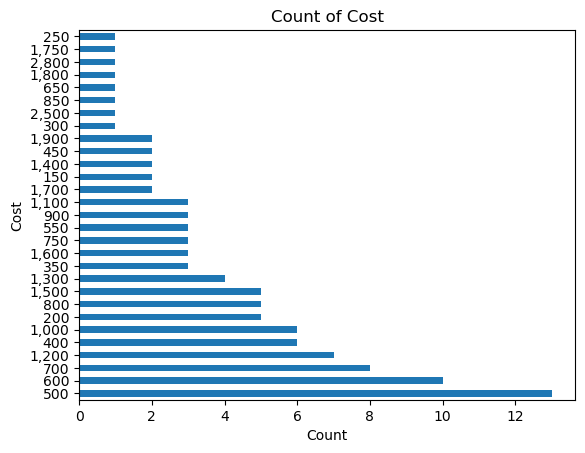

In [9]:
df['Cost'].value_counts().plot.barh()
plt.title('Count of Cost')
plt.xlabel('Count')
plt.ylabel('Cost')
plt.show()

In [10]:
# Vectorization for Name
tfidf = TfidfVectorizer(stop_words='english', lowercase=True, max_features= 100)
tfvectors = tfidf.fit_transform(df['Name'])
vectors = tfvectors.toarray()
vocabulary = tfidf.vocabulary_
print(len(vocabulary))

100


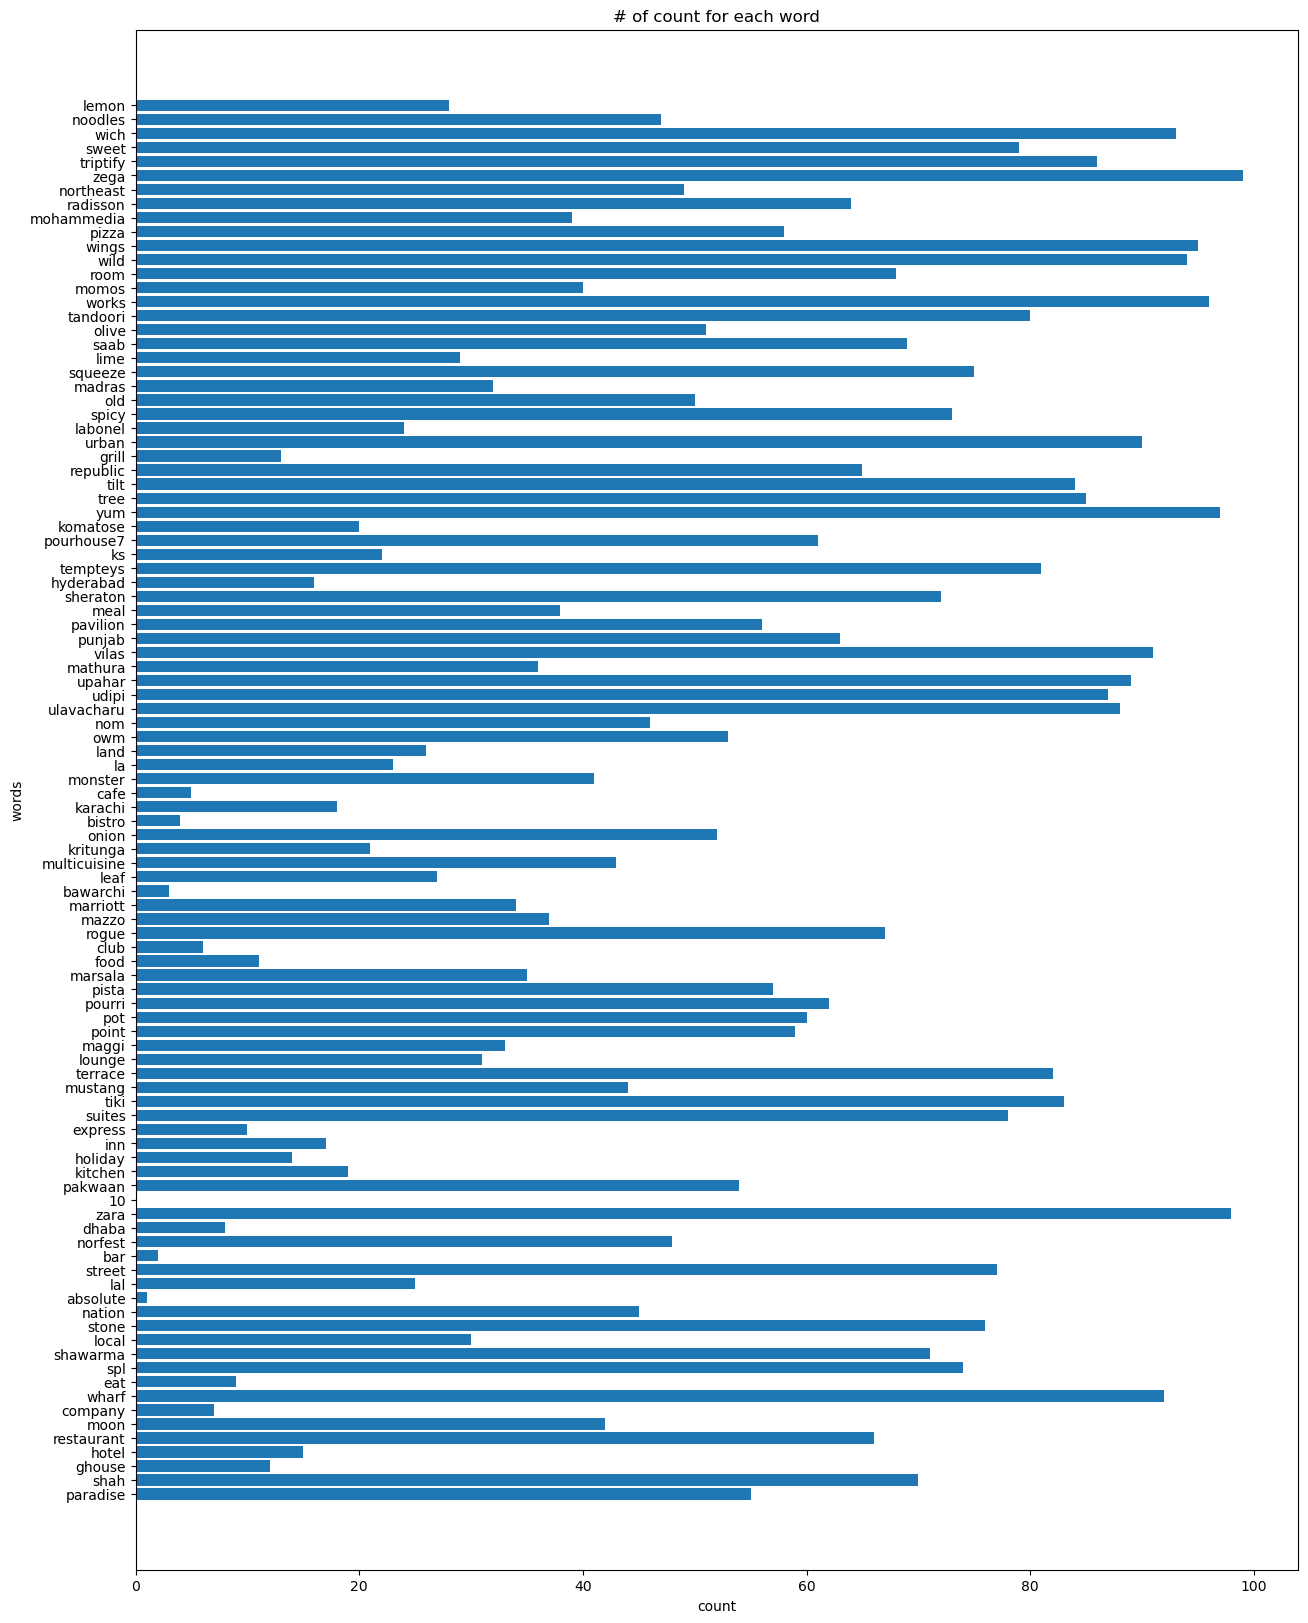

In [11]:
# Word count visualization
plt.rcParams['figure.figsize'] = (15,20)
plt.barh(list(vocabulary.keys()), vocabulary.values())
plt.title('# of count for each word')
plt.ylabel('words')
plt.xlabel('count')
plt.show()

In [12]:
df['tags']= df['Name']+' '+df['Cost']+' '+df['Cuisines'] # Concatening columns for tokenization
df.head()

,Name,Cost,Cuisines,tags
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","Beyond Flavours 800 Chinese, Continental, Keba..."
1,Paradise,800,"Biryani, North Indian, Chinese","Paradise 800 Biryani, North Indian, Chinese"
2,Flechazo,"1,300","Asian, Mediterranean, North Indian, Desserts","Flechazo 1,300 Asian, Mediterranean, North Ind..."
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...","Shah Ghouse Hotel & Restaurant 800 Biryani, No..."
4,Over The Moon Brew Company,"1,200","Asian, Continental, North Indian, Chinese, Med...","Over The Moon Brew Company 1,200 Asian, Contin..."


In [13]:
tf_idf =TfidfVectorizer(ngram_range=(1,3))
vectors = tf_idf.fit_transform(df['tags']).toarray()
vocabulary = tf_idf.vocabulary_
print(len(vocabulary))

1217


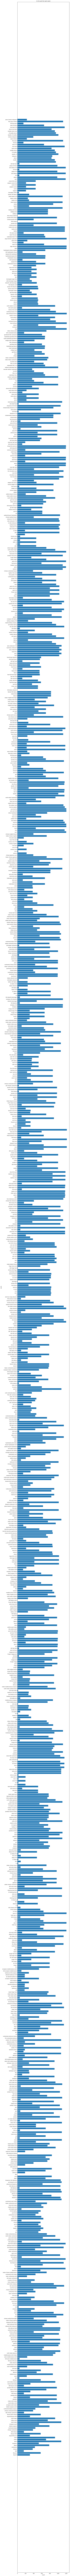

In [14]:
# Word count visualization
plt.rcParams['figure.figsize'] = (10,500)
plt.barh(list(vocabulary.keys()), vocabulary.values())
plt.title('# of count for each word')
plt.ylabel('words')
plt.xlabel('count')
plt.show()

In [15]:
!mkdir preprocessed_data
df.to_csv('./preprocessed_data/eda_names.csv') # save the file

A subdirectory or file preprocessed_data already exists.
